In [2]:
! pip install janitor
! pip install pandas-profiling
! pip install missingno

  Stored in directory: C:\Users\maria\AppData\Local\pip\Cache\wheels\5a\72\34\75357305ce0e7114dbe3dc4c224b7f7357d2add4545ac5ab66
Successfully built janitor


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

%matplotlib inline
%time

Wall time: 0 ns


In [7]:
df = pd.read_csv(r'C:\Users\maria\Desktop\Data Science\01. Group\Desafio03\Pedidos_de_reembolso_de_executivos.csv', delimiter = ";")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
bugged_date                       1048575 non-null int64
receipt_date                      1048575 non-null object
employee_id                       1048575 non-null int64
work_group                        1048575 non-null object
state_code                        1048575 non-null object
employee                          1048575 non-null object
receipt_social_security_number    860939 non-null float64
receipt_description               1048575 non-null object
establishment_name                1048575 non-null object
receipt_value                     1048575 non-null int64
dtypes: float64(1), int64(3), object(6)
memory usage: 80.0+ MB


In [9]:
import missingno

In [31]:
df.columns

Index(['bugged_date', 'receipt_date', 'employee_id', 'work_group',
       'state_code', 'employee', 'receipt_social_security_number',
       'receipt_description', 'establishment_name', 'receipt_value', 'rssn',
       'rssn_2'],
      dtype='object')

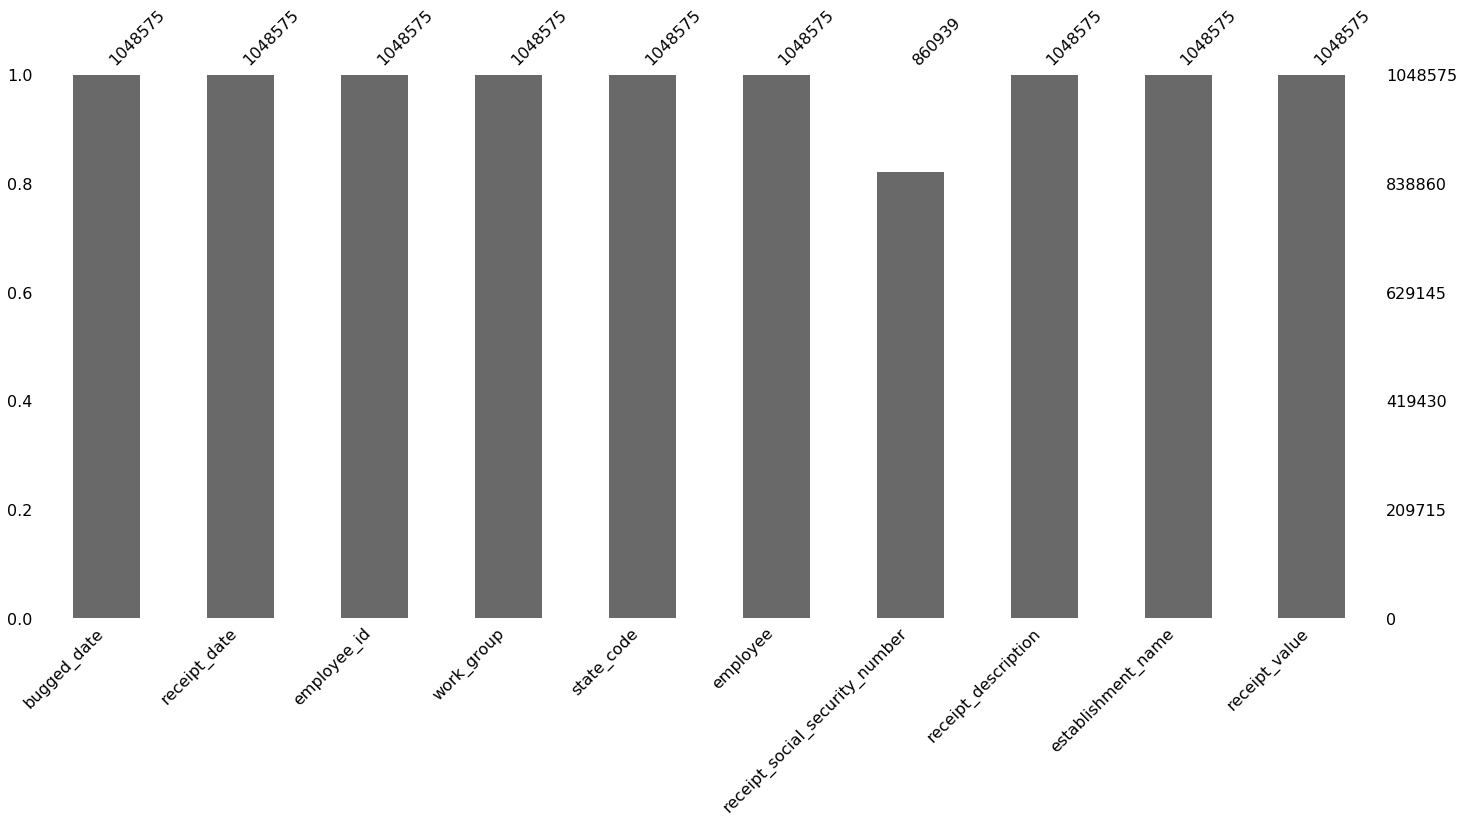

In [10]:
missingno.bar(df)

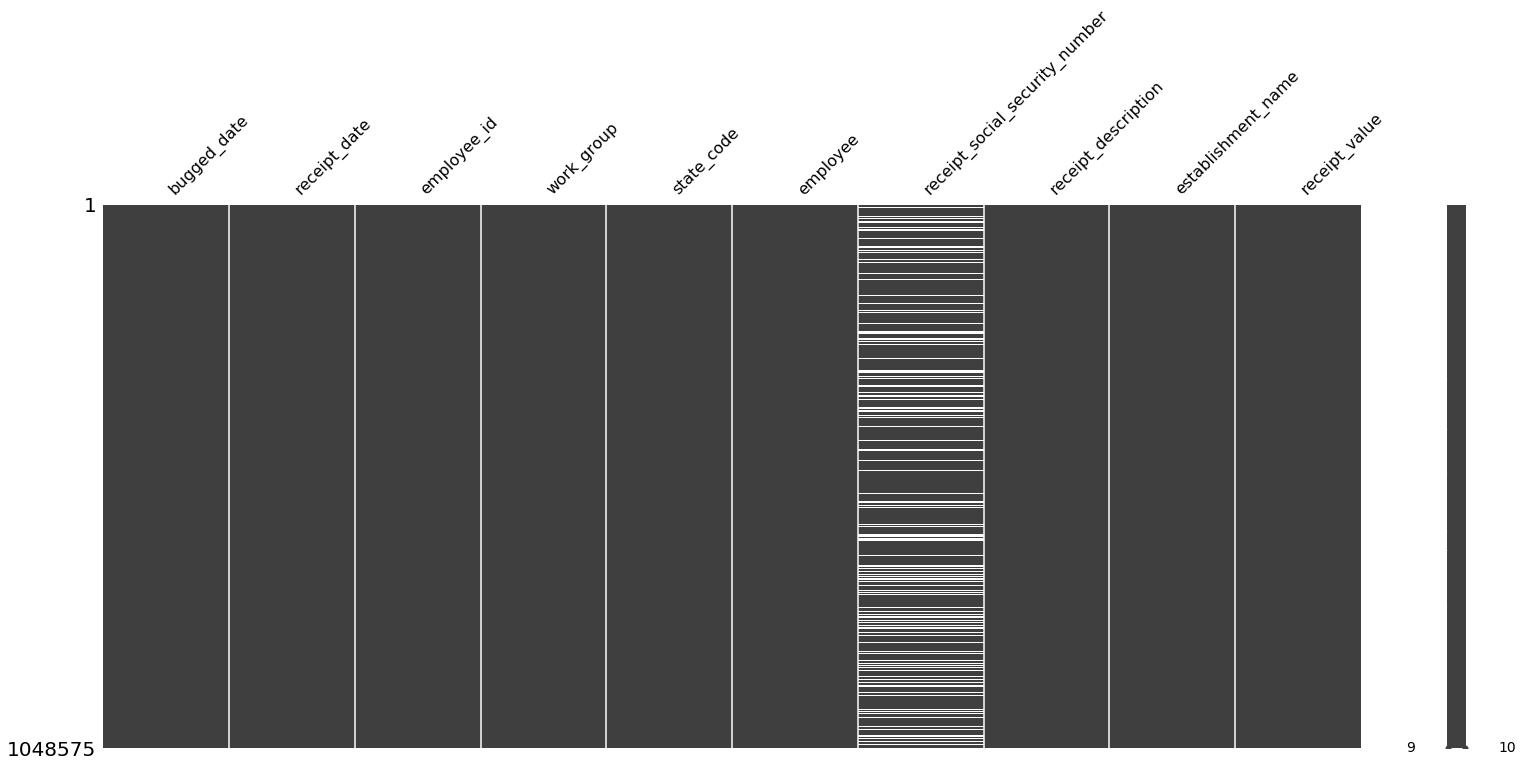

In [14]:
missingno.matrix(df)

In [16]:
df['rssn'] = df['receipt_social_security_number']

In [23]:
df['rssn'].count() 

673303

In [24]:
df['rssn'].isnull().sum()
# Encontrado 187.363 reembolsos sem nomes. Acho mais interessantes olhar esses valores

187636

In [25]:
df['rssn'].count()  - df['rssn'].isnull().sum()
# Encontrei 673.303 valores não-nulos

673303

In [27]:
df['rssn_2'] = df['rssn'].fillna(0)

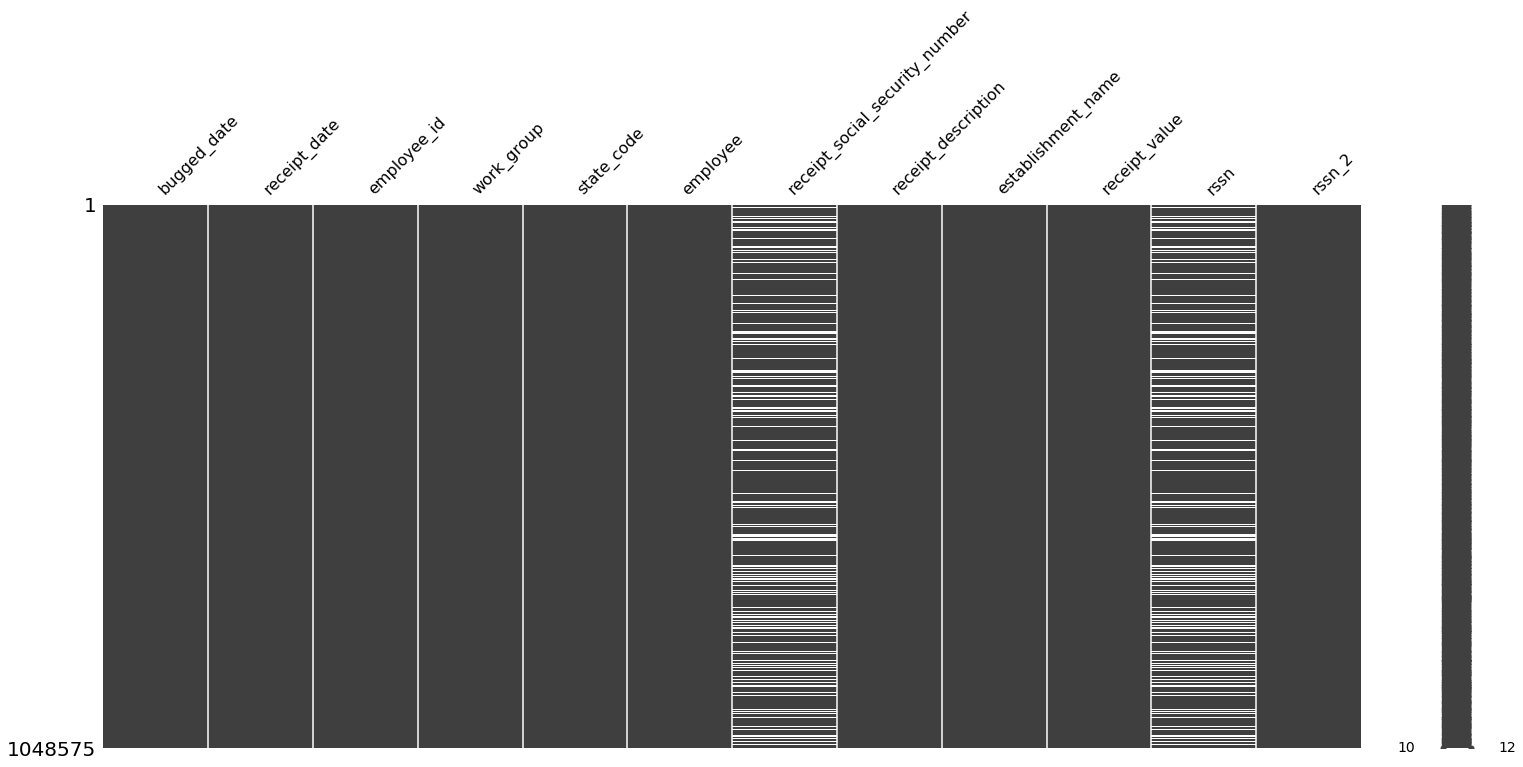

In [28]:
missingno.matrix(df)

In [33]:
df.drop('receipt_social_security_number', axis=1, inplace=True)

In [37]:
df.groupby('receipt_description')['rssn_2'].count()

receipt_description
Airline tickets                                                   297082
Consultancies, Researches and Technical Works.                      7748
Dissemination of the Parliamentary Activity.                       24885
Food and Meals                                                     75638
Fuels and lubricants.                                             209797
Hosting, except for the Parliamentary in the Federal District.     17220
Land, Sea or River Tickets                                           884
Leasing or Chartering of Boats                                        94
Maintenance of Office                                              59959
Postal Services                                                   116990
Publication Subscription                                            1271
Rental or Chartering of Motor Vehicles                              4659
Renting of motor vehicles or chartering of boats                   60872
Renting or Chartering of Aircra

In [38]:
df.groupby('rssn_2')['receipt_value'].sum()

rssn_2
0.000000e+00    41095014
1.918680e+05       25200
9.911472e+06        1629
2.141515e+07      108000
3.129978e+07        6621
4.200012e+07        5812
4.200020e+07       19203
4.200039e+07        1930
4.200056e+07        3626
4.200064e+07       22007
4.200072e+07         750
4.200081e+07        9300
4.200098e+07        5985
4.200101e+07       16046
5.364280e+07          26
1.042271e+08        2400
1.132983e+08       63083
1.149872e+08       76500
1.185402e+08        1030
1.433404e+08        2550
1.660003e+08          37
1.821832e+08        2100
1.945469e+08       23580
1.949310e+08         380
2.183639e+08        2248
2.344483e+08        1400
2.353694e+08         283
2.557115e+08         400
2.790469e+08        1969
2.866695e+08       57500
                  ...   
9.804063e+13        2074
9.804212e+13         490
9.804212e+13         133
9.804212e+13        1520
9.804212e+13         149
9.804229e+13        2039
9.804229e+13         112
9.810227e+13         215
9.810634e+13      

In [52]:
df['month_year'] = pd.to_datetime(df['receipt_date']).dt.to_period('M')
df['year'] = pd.DatetimeIndex(df['receipt_date']).year
df.head()

,bugged_date,receipt_date,employee_id,work_group,state_code,employee,receipt_description,establishment_name,receipt_value,rssn,rssn_2,month_year,year
0,0,27/03/2013 00:00,1772,grupo 1,SP,func 1,Fuels and lubricants.,AUTO POSTO 314 NORTE LTDA,70,3.530749e+12,3.530749e+12,2013-03,2013
1,0,24/07/2013 00:00,1772,grupo 1,SP,func 1,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,104,8.202116e+12,8.202116e+12,2013-07,2013
2,0,17/02/2013 00:00,1772,grupo 1,SP,func 1,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,8.202116e+12,8.202116e+12,2013-02,2013
3,0,15/03/2013 00:00,1772,grupo 1,SP,func 1,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,100,8.202116e+12,8.202116e+12,2013-03,2013
4,0,27/01/2013 00:00,1772,grupo 1,SP,func 1,Fuels and lubricants.,AUTO POSTO AEROPORTO LTDA,77,8.202116e+12,8.202116e+12,2013-01,2013


In [40]:
? sns.barplot

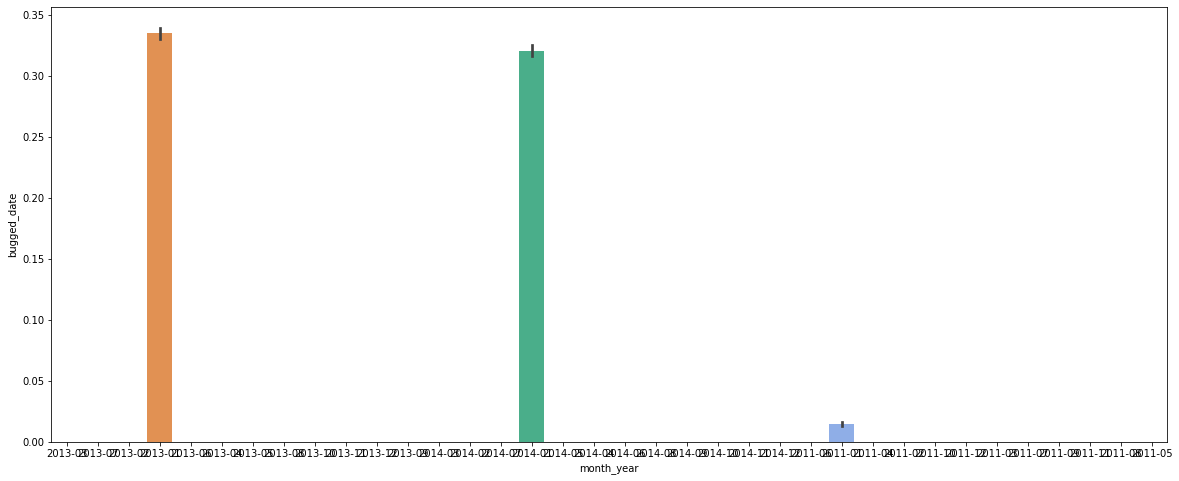

In [45]:
plt.figure(figsize=(20, 8))
sns.barplot(x=df['month_year'], y= df['bugged_date'])

In [51]:
df.groupby('month_year')['receipt_value'].sum()

month_year
2011-01    21988469
2011-02    12644639
2011-03    15689719
2011-04    14186913
2011-05    15176686
2011-06    14250675
2011-07    12842312
2011-08    13275419
2011-09    13885829
2011-10    14420136
2011-11    13665222
2011-12    14881741
2013-01    25728887
2013-02    16909429
2013-03    16058304
2013-04    17123607
2013-05    19884042
2013-06    15063684
2013-07    13532661
2013-08    15540383
2013-09    14975784
2013-10    17581218
2013-11    16209689
2013-12    17381307
2014-01    24283199
2014-02    18186712
2014-03    21184399
2014-04    17144869
2014-05    22097741
2014-06    13294422
2014-07    14028224
2014-08    10077266
2014-09    10036421
2014-10    19362938
2014-11    21100279
2014-12    24669632
Freq: M, Name: receipt_value, dtype: int64

In [53]:
import pandas_profiling as pp

In [54]:
pp.ProfileReport(df)